In [1]:
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import helper_functions as hf
warnings.filterwarnings('ignore')

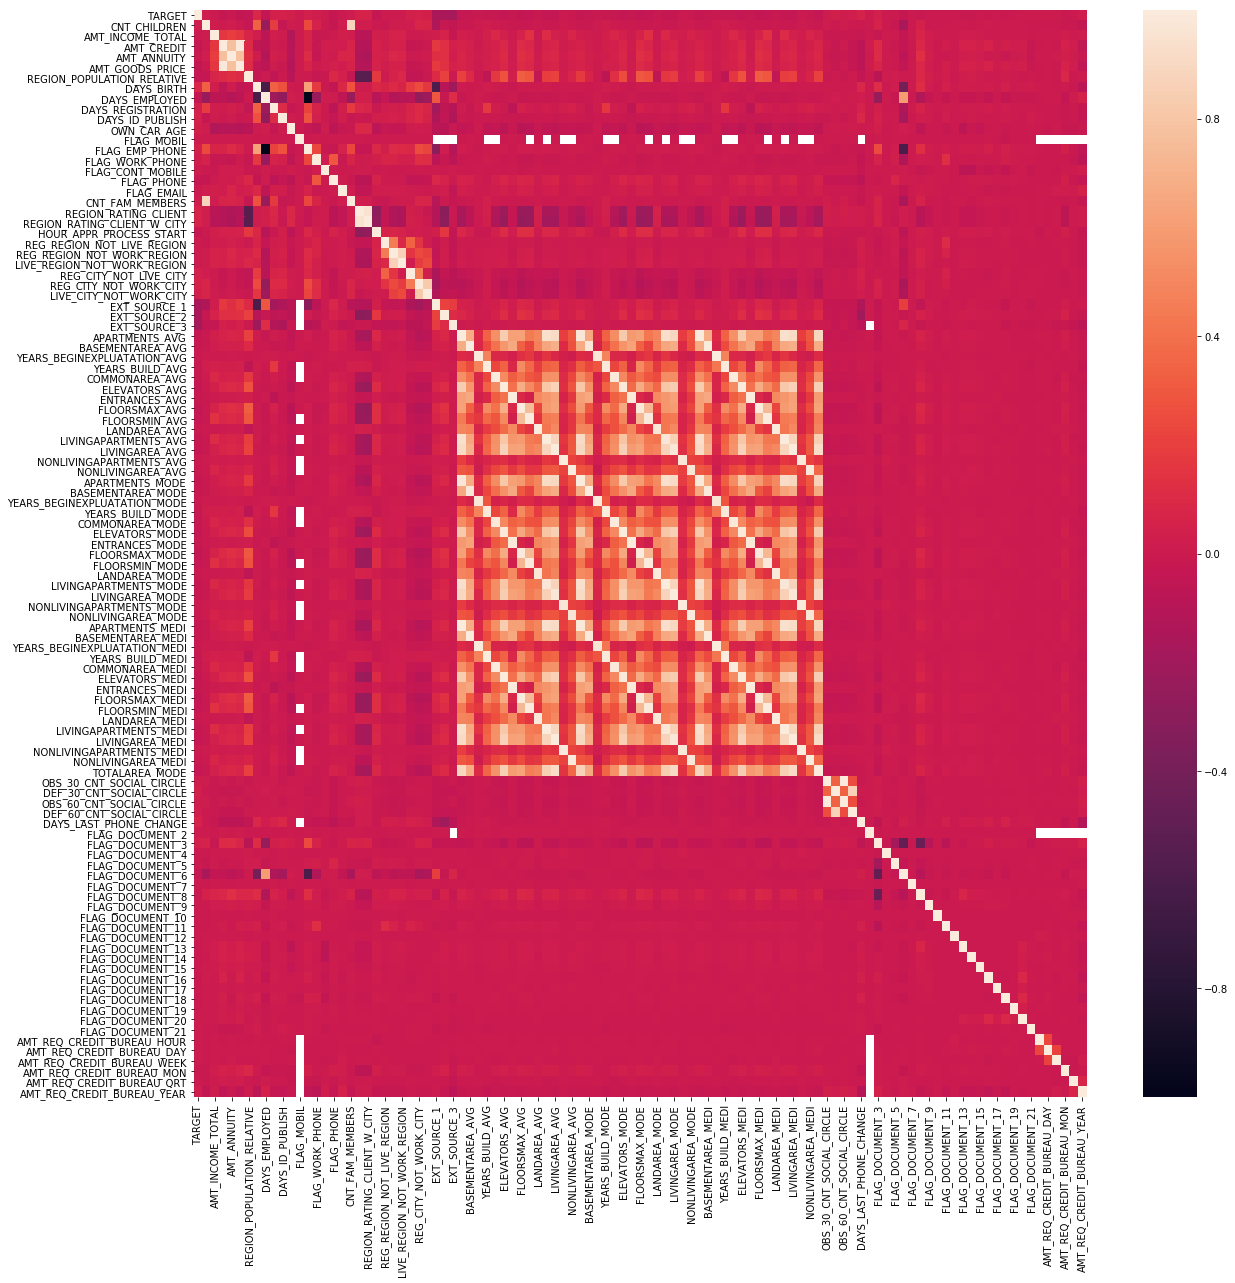

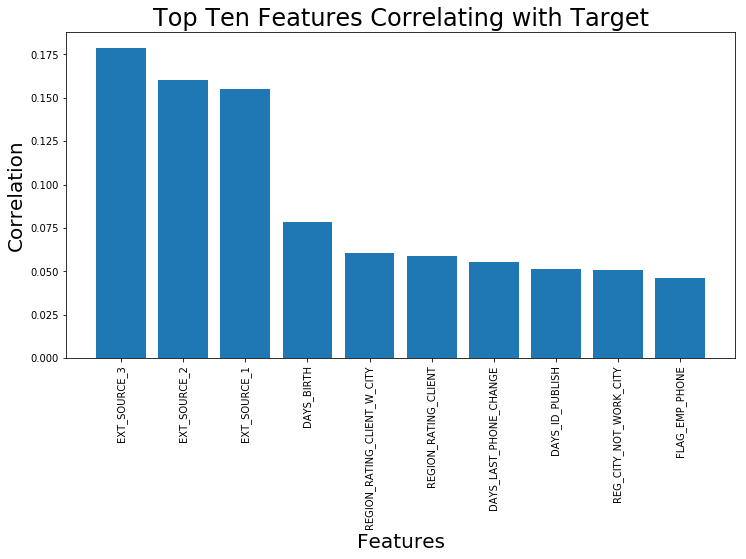

EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64

In [2]:
train = pd.read_csv('application_train.csv').set_index('SK_ID_CURR')
test = pd.read_csv('application_test.csv').set_index('SK_ID_CURR')
labels = train['TARGET']
X = pd.concat([train.drop('TARGET',axis=1),test],axis=0)

plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

top_ten = abs(train.corr()['TARGET']).sort_values(ascending=False)[1:11]
x = np.arange(10)
plt.figure(figsize=(12,6))
plt.bar(x,top_ten)
plt.xticks(x, top_ten.index,rotation=90)
plt.title('Top Ten Features Correlating with Target',fontsize=24)
plt.ylabel('Correlation',fontsize=20)
plt.xlabel('Features',fontsize=20)
plt.show()
top_ten

In [3]:
for i,v in train.iloc[0].iteritems():
    print(i,v)

TARGET 1
NAME_CONTRACT_TYPE Cash loans
CODE_GENDER M
FLAG_OWN_CAR N
FLAG_OWN_REALTY Y
CNT_CHILDREN 0
AMT_INCOME_TOTAL 202500.0
AMT_CREDIT 406597.5
AMT_ANNUITY 24700.5
AMT_GOODS_PRICE 351000.0
NAME_TYPE_SUITE Unaccompanied
NAME_INCOME_TYPE Working
NAME_EDUCATION_TYPE Secondary / secondary special
NAME_FAMILY_STATUS Single / not married
NAME_HOUSING_TYPE House / apartment
REGION_POPULATION_RELATIVE 0.018801
DAYS_BIRTH -9461
DAYS_EMPLOYED -637
DAYS_REGISTRATION -3648.0
DAYS_ID_PUBLISH -2120
OWN_CAR_AGE nan
FLAG_MOBIL 1
FLAG_EMP_PHONE 1
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 1
FLAG_PHONE 1
FLAG_EMAIL 0
OCCUPATION_TYPE Laborers
CNT_FAM_MEMBERS 1.0
REGION_RATING_CLIENT 2
REGION_RATING_CLIENT_W_CITY 2
WEEKDAY_APPR_PROCESS_START WEDNESDAY
HOUR_APPR_PROCESS_START 10
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE Business Entity Type 3
EXT_SOURCE_1 0.0830369673913225

In [4]:
X['NAME_INCOME_TYPE'].replace(['Maternity leave','Businessman','Student','Unemployed'],np.nan,inplace=True)
X['NAME_TYPE_SUITE'].replace(['Other_B','Other_A','Student','Group of people'],np.nan,inplace=True)
X['NAME_FAMILY_STATUS'].replace(['Unknown'],np.nan,inplace=True)
X['CODE_GENDER'].replace('XNA',np.nan,inplace=True)

X['CNT_FAM_MEMBERS'].replace(np.nan,0.0,inplace=True)
X['CNT_CHILDREN'] = X['CNT_CHILDREN'].astype('float64').replace(np.nan,0.0)
X['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True
X['DAYS_ID_PUBLISH'] = X['DAYS_ID_PUBLISH'].astype('float64')
X['DAYS_BIRTH'] = X['DAYS_BIRTH'].astype('float64')
X['HOUR_APPR_PROCESS_START'] = X['HOUR_APPR_PROCESS_START'].astype('float64')

X_cats = X.select_dtypes(exclude=['float64']).apply(lambda x:pd.factorize(x)[0])
X_nums = X.select_dtypes(include=['float64'])

X_nums['APP_f1'] = X_nums['OBS_30_CNT_SOCIAL_CIRCLE'] - X_nums['DEF_30_CNT_SOCIAL_CIRCLE']
X_nums['APP_f2'] = X_nums['DEF_60_CNT_SOCIAL_CIRCLE'] - X_nums['DEF_30_CNT_SOCIAL_CIRCLE']
X_nums['APP_f3'] = X_nums['AMT_CREDIT'] / X_nums['AMT_ANNUITY']
X_nums['APP_f4'] = X_nums['AMT_INCOME_TOTAL'] / X_nums['AMT_CREDIT']
X_nums['APP_f5'] = X_nums['AMT_ANNUITY'] / X_nums['AMT_INCOME_TOTAL']
X_nums['APP_f6'] = X_nums['EXT_SOURCE_1'] + X_nums['EXT_SOURCE_2'] + X_nums['EXT_SOURCE_3']
X_nums['APP_f7'] = X_nums['DAYS_BIRTH'] / X_nums['DAYS_EMPLOYED']
X_nums['APP_f8'] = X_nums['DAYS_REGISTRATION'] / X_nums['DAYS_ID_PUBLISH']
X_nums['APP_f9'] = X_nums['DAYS_EMPLOYED'] / X_nums['OWN_CAR_AGE']
X_nums['APP_f10'] = X_nums['CNT_CHILDREN'] / X_nums['CNT_FAM_MEMBERS']

features = pd.concat([X_cats,X_nums],axis=1)
features = hf.drop_high_corrs(features,0.95)
features

Removing 32 columns ['AMT_GOODS_PRICE', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'APP_f1', 'APP_f10']


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APP_f2,APP_f3,APP_f4,APP_f5,APP_f6,APP_f7,APP_f8,APP_f9
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,16.461104,0.498036,0.121978,0.485361,14.852433,1.720755,NaN
100003,0,1,0,1,1,1,1,1,0,0,...,0.0,0.0,0.0,36.234085,0.208736,0.132217,NaN,14.111953,4.075601,NaN
100004,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,20.000000,0.500000,0.100000,NaN,84.648889,1.683129,-8.653846
100006,0,1,0,0,0,0,0,2,0,0,...,NaN,NaN,0.0,10.532818,0.431748,0.219900,NaN,6.253702,4.034879,NaN
100007,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,23.461618,0.236842,0.179963,NaN,6.560895,1.246674,NaN
100008,0,0,0,0,2,1,0,1,0,0,...,1.0,1.0,0.0,17.824857,0.201837,0.277955,NaN,10.668136,10.419287,NaN
100009,0,1,1,0,0,2,1,1,0,0,...,1.0,2.0,0.0,37.789061,0.109564,0.241526,1.990821,4.401917,1.959612,-184.117647
100010,0,0,1,0,0,1,1,1,0,0,...,0.0,0.0,0.0,36.363636,0.235294,0.116875,NaN,41.982183,1.932325,-56.125000
100011,0,1,0,0,3,3,0,1,0,0,...,0.0,1.0,0.0,30.142344,0.110336,0.300680,1.544805,NaN,2.113546,NaN


In [5]:
features.to_csv('app.csv',columns=features.columns)

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(features.loc[train.index], labels, test_size=0.15, random_state=8)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'max_depth':3,
    'boosting_type': 'goss',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 7,
    'learning_rate': 0.005,
    'feature_fraction': 0.55,
    'verbose': 0,
    'min_data_in_leaf':2000,
    'min_gain_to_split':0.01,
    'scale_pos_weight':2,
    'max_bin':200,
    'bin_construct_sample_cnt':250000,
    'categorical_feature':list(range(50)),
    'cat_smooth':200
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=25000,
                valid_sets=lgb_eval,
                early_stopping_rounds=400)

y_test_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)

train_score = roc_auc_score(y_train, y_train_pred)
test_score = roc_auc_score(y_test, y_test_pred)

print('The training score is', train_score)
print('The test score is', test_score)